# Ở đây đầu tiên em cài đặt thư viện torch

In [1]:
!pip install torch


  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

# Bước 1: Khởi Tạo Các Vector Truy Vấn (Query), Khoá (Key), Giá Trị (Value)
# Ở bước này, em sẽ tạo các embedding cho các từ "The", "cat", "sat".
# Sau đó, em sẽ tạo các vector Q, K, V bằng cách nhân embedding với các ma trận trọng số.
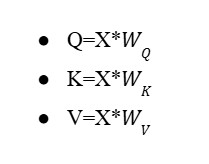

In [2]:
import torch
import torch.nn.functional as F
embeddings = torch.tensor([[1.0, 0.0],
                           [0.0, 1.0],
                           [0.5, 0.5]])
W_Q = torch.eye(2)
W_K = torch.eye(2)
W_V = torch.eye(2)

Q = torch.matmul(embeddings, W_Q)
K = torch.matmul(embeddings, W_K)
V = torch.matmul(embeddings, W_V)

print("Q:", Q)
print("K:", K)
print("V:", V)


Q: tensor([[1.0000, 0.0000],
        [0.0000, 1.0000],
        [0.5000, 0.5000]])
K: tensor([[1.0000, 0.0000],
        [0.0000, 1.0000],
        [0.5000, 0.5000]])
V: tensor([[1.0000, 0.0000],
        [0.0000, 1.0000],
        [0.5000, 0.5000]])


# Bước 2: Tính Điểm Attention
# Em sẽ tính điểm attention giữa các từ bằng cách nhân các vector Q với K và chuẩn hóa bằng căn bậc hai của kích thước chiều.
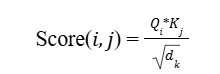

In [3]:

dk = Q.size(-1)
scores = torch.matmul(Q, K.transpose(-2, -1)) / torch.sqrt(torch.tensor(dk, dtype=torch.float32))

print("Attention scores:", scores)


Attention scores: tensor([[0.7071, 0.0000, 0.3536],
        [0.0000, 0.7071, 0.3536],
        [0.3536, 0.3536, 0.3536]])


# Bước 3: Áp Dụng Hàm Softmax
# Em áp dụng hàm softmax lên các điểm attention để chuyển chúng thành các xác suất.
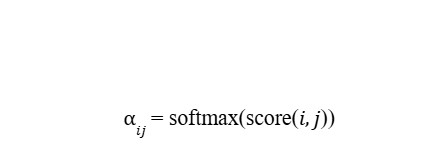

In [4]:
attention_weights = F.softmax(scores, dim=-1)
print("Attention weights:", attention_weights)


Attention weights: tensor([[0.4555, 0.2246, 0.3199],
        [0.2246, 0.4555, 0.3199],
        [0.3333, 0.3333, 0.3333]])


# Bước 4: Tính Tổng Trọng Số của Các Giá Trị
# Cuối cùng, em sẽ tính tổng trọng số của các giá trị (V) dựa trên các trọng số attention đã tính.
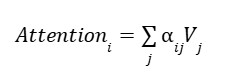

In [5]:
attention_output = torch.matmul(attention_weights, V)
print("Attention output:", attention_output)


Attention output: tensor([[0.6155, 0.3845],
        [0.3845, 0.6155],
        [0.5000, 0.5000]])
